In [1]:
%load_ext autoreload
%autoreload 2

# Get a book

In [11]:
import ipywidgets as widgets
opt_books = widgets.Dropdown(description='books', options=[
    ('A Study in Scarlet (en)', 244), 
    ('Pride and Prejudice (en)', 1342),
    ('Les Misérables (en)', 135),
    ('Buddenbrooks: Verfall einer Familie (de)', 34811),
    ('Les trois mousquetaires (fr)', 13951),
    ('Bajki (pl)', 27729),
    ('Buddah (zn)', 23585)
])
display(opt_books)

Dropdown(description='books', options=(('A Study in Scarlet (en)', 244), ('Pride and Prejudice (en)', 1342), (…

In [3]:
from utils.gutenberg import get_book

book = get_book(opt_books.value)

# Split text into smaller parts

For longer text documents, like those found in Project Gutenberg, it's not practical to use them in their entirety for retrieval and training large language models. Therefore, it's essential to divide them into smaller pieces. However, this process should strike a balance between the size (number of tokens) and the semantic coherence of these smaller segments. Smaller splits can result in numerous fragmented but semantically related pieces, while larger splits may obscure the document's semantics. Achieving the right balance is crucial for effective document processing and understanding.

## Splitting along words

In [4]:
from langchain.schema.document import Document
from langchain.text_splitter import (
    TextSplitter, CharacterTextSplitter, RecursiveCharacterTextSplitter, NLTKTextSplitter,
    Language
)

# turn off warnings
import logging
logging.getLogger().setLevel(logging.ERROR)

def split_and_print(book: Document, splitter: TextSplitter, print_parts: list[int] = None):
    parts = splitter.split_text(book.page_content)
    print(f'document length: {len(book.page_content)}')
    print(f' document parts: {len(parts)}')
    print(f'   sum of parts: {sum([len(part) for part in parts])}')
    print(f' parts overhead: {sum([len(part) for part in parts]) / len(book.page_content)}')
    print(f'avg part length: {sum([len(part) for part in parts]) / len(parts)}\n')

    print(f'first 10 parts:')

    for part in parts[:10]:
        print(repr(part))
    for part in (print_parts or []):
        print(f'\n\npart {part}:\n{parts[part]}')

In [5]:
text_splitter = CharacterTextSplitter(        
    separator = " ",
    chunk_size = 1000,
    chunk_overlap  = 200,
    add_start_index = True
)

split_and_print(book, text_splitter, [5,6])

document length: 239369
 document parts: 299
   sum of parts: 297818
 parts overhead: 1.2441794885720374
avg part length: 996.0468227424749

first 10 parts:
'A STUDY IN SCARLET\n\nBy A. Conan Doyle\n\n\n\n\nCONTENTS\n\nA STUDY IN SCARLET.\n\nPART I.\nCHAPTER I. MR. SHERLOCK HOLMES.\nCHAPTER II. THE SCIENCE OF DEDUCTION.\nCHAPTER III. THE LAURISTON GARDENS MYSTERY\nCHAPTER IV. WHAT JOHN RANCE HAD TO TELL.\nCHAPTER V. OUR ADVERTISEMENT BRINGS A VISITOR.\nCHAPTER VI. TOBIAS GREGSON SHOWS WHAT HE CAN DO.\nCHAPTER VII. LIGHT IN THE DARKNESS.\n\nPART II. THE COUNTRY OF THE SAINTS\nCHAPTER I. ON THE GREAT ALKALI PLAIN.\nCHAPTER II. THE FLOWER OF UTAH.\nCHAPTER III. JOHN FERRIER TALKS WITH THE PROPHET.\nCHAPTER IV. A FLIGHT FOR LIFE.\nCHAPTER V. THE AVENGING ANGELS.\nCHAPTER VI. A CONTINUATION OF THE REMINISCENCES OF JOHN WATSON, M.D.\nCHAPTER VII. THE CONCLUSION.\n\n\n\n\nA STUDY IN SCARLET.\n\n\n\n\nPART I.\n\n\n(_Being a reprint from the Reminiscences of_ JOHN H. WATSON, M.D.,\n_Late of the

## Splitting along sentences

In [6]:
import nltk

texts = [
    "He always apologized to me for putting me to this inconvenience. “I have to use this room as a place of business,” he said, “and these people are my clients”. Again I had an opportunity of asking him a point blank question, and again my delicacy prevented me from forcing another man to confide in me.",
    "Dr. Watson will help you. We go to the U.S.A., i.e., not to Italy; Mrs. Hussey is there!",
    '''"A clam for supper? a cold clam; is THAT what you mean, Mrs. Hussey?" says I, "but that's a rather cold and clammy reception in the winter time, ain't it, Mrs. Hussey?"''',
    book.page_content[4205:5000]
]

for text in texts:
    sentences = nltk.sent_tokenize(text)
    print("\n--\n".join(sentences))
    print('--')


He always apologized to me for putting me to this inconvenience.
--
“I have to use this room as a place of business,” he said, “and these people are my clients”.
--
Again I had an opportunity of asking him a point blank question, and again my delicacy prevented me from forcing another man to confide in me.
--
Dr. Watson will help you.
--
We go to the U.S.A., i.e., not to Italy; Mrs. Hussey is there!
--
"A clam for supper?
--
a cold clam; is THAT what you mean, Mrs.
--
Hussey?"
--
says I, "but that's a rather cold and clammy reception in the winter time, ain't it, Mrs.
--
Hussey?"
--
In old days Stamford had
never been a particular crony of mine, but now I hailed him with
enthusiasm, and he, in his turn, appeared to be delighted to see me.
--
In
the exuberance of my joy, I asked him to lunch with me at the Holborn,
and we started off together in a hansom.
--
“Whatever have you been doing with yourself, Watson?” he asked in
undisguised wonder, as we rattled through the crowded London str

In [11]:
text_splitter = NLTKTextSplitter(
    separator = "\n\n",
    chunk_size = 1000,
    chunk_overlap  = 200,
    add_start_index = True
)

split_and_print(book, text_splitter, [4,5])

document length: 725681
 document parts: 918
   sum of parts: 809846
 parts overhead: 1.1159807132886213
avg part length: 882.1851851851852

first 10 parts:
'[Illustration:\n\nGEORGE ALLEN\nPUBLISHER\n\n156 CHARING CROSS ROAD\nLONDON\n\nRUSKIN HOUSE\n]\n\n[Illustration:\n\n_Reading Jane’s Letters._      _Chap 34._\n]\n\n\n\n\nPRIDE.\n\nand\nPREJUDICE\n\nby\nJane Austen,\n\nwith a Preface by\nGeorge Saintsbury\nand\nIllustrations by\nHugh Thomson\n\n[Illustration: 1894]\n\nRuskin       156.\n\nCharing\nHouse.\n\nCross Road.\n\nLondon\nGeorge Allen.\n\nCHISWICK PRESS:--CHARLES WHITTINGHAM AND CO.\nTOOKS COURT, CHANCERY LANE, LONDON.\n\n[Illustration:\n\n_To J. Comyns Carr\nin acknowledgment of all I\nowe to his friendship and\nadvice, these illustrations are\ngratefully inscribed_\n\n_Hugh Thomson_\n]\n\n\n\n\nPREFACE.\n\n[Illustration]\n\n\n_Walt Whitman has somewhere a fine and just distinction between “loving\nby allowance” and “loving with personal love.” This distinction applies\nto

## Splitting along content structure

The Gutenber documents have a good structure with empty lines between paragraphs, and several empty lines before chapters and parts. Let's split on chapters ignoring chunk size and overlap.

In [23]:
text_splitter = CharacterTextSplitter(        
    separator = "\n\n\n\n",
    chunk_size = 100,
    chunk_overlap  = 20,
    add_start_index = True
)

split_and_print(book, text_splitter, [])

document length: 1519868
 document parts: 117
   sum of parts: 1519484
 parts overhead: 0.999747346480089
avg part length: 12987.042735042734

first 10 parts:
'Produced by Jana Srna, Norbert H. Langkau and the Online\nDistributed Proofreading Team at http://www.pgdp.net'
'[ Anmerkungen zur Transkription:\n\nSchreibweise und Interpunktion des Originaltextes wurden übernommen;\nlediglich offensichtliche Druckfehler wurden korrigiert. Listen der\nvorgenommenen Änderungen sowie der beibehaltenen inkonsistenten\nSchreibweisen finden sich am Ende des Textes.\n\nIm Original gesperrt gedruckter Text wurde mit = markiert.\nIm Original in Antiqua gedruckter Text wurde mit _ markiert.\n]'
'THOMAS MANN + BUDDENBROOKS\n\n\n\n\nTHOMAS MANN\n\nBuddenbrooks\n\nVerfall\neiner\nFamilie'
'DEUTSCHE BUCH-GEMEINSCHAFT\nGMBH\n\nBerlin'
'Mit Genehmigung von S. Fischer Verlag, Berlin\n\nCopyright 1909 by S. Fischer Verlag, Berlin\n\nAlle Rechte vorbehalten'
'Buddenbrooks\n\n\n\n\nErster Teil'
"Erstes Kapitel\n

But we can also split along paragraphs and 

In [13]:
text_splitter = RecursiveCharacterTextSplitter(        
    separators = ["\n\n\n\n", "\n\n"],
    chunk_size = 100,
    chunk_overlap  = 20,
    add_start_index = True,
    keep_separator = False
)

split_and_print(book, text_splitter, [11, 12, 13, 14, 15])

document length: 725681
 document parts: 2293
   sum of parts: 720798
 parts overhead: 0.9932711480664369
avg part length: 314.347143480157

first 10 parts:
'[Illustration:\n\nGEORGE ALLEN\nPUBLISHER\n\n156 CHARING CROSS ROAD\nLONDON\n\nRUSKIN HOUSE\n]'
'RUSKIN HOUSE\n]\n\n[Illustration:\n\n_Reading Jane’s Letters._      _Chap 34._\n]'
'PRIDE.\nand\nPREJUDICE\n\nby\nJane Austen,'
'by\nJane Austen,\n\nwith a Preface by\nGeorge Saintsbury\nand\nIllustrations by\nHugh Thomson'
'[Illustration: 1894]\n\nRuskin       156. Charing\nHouse.        Cross Road.\n\nLondon\nGeorge Allen.'
'CHISWICK PRESS:--CHARLES WHITTINGHAM AND CO.\nTOOKS COURT, CHANCERY LANE, LONDON.'
'[Illustration:'
'_To J. Comyns Carr\nin acknowledgment of all I\nowe to his friendship and\nadvice, these illustrations are\ngratefully inscribed_'
'_Hugh Thomson_\n]'
'PREFACE.\n\n[Illustration]'


part 11:
_I suppose, however, that the majority of at least competent votes
would, all things considered, be divided between_ Emma _a

If we mind the small paragraphs, we can also combine smaller paragraphs using larger chunk size

In [14]:
text_splitter = RecursiveCharacterTextSplitter(        
    separators = ["\n\n\n\n", "\n\n"],
    chunk_size = 1000,
    chunk_overlap  = 200,
    add_start_index = True
)

split_and_print(book, text_splitter, [5, 6])

document length: 725681
 document parts: 937
   sum of parts: 755459
 parts overhead: 1.0410345592622654
avg part length: 806.2529348986126

first 10 parts:
'[Illustration:\n\nGEORGE ALLEN\nPUBLISHER\n\n156 CHARING CROSS ROAD\nLONDON\n\nRUSKIN HOUSE\n]\n\n[Illustration:\n\n_Reading Jane’s Letters._      _Chap 34._\n]\n\n\n\n\nPRIDE.\nand\nPREJUDICE\n\nby\nJane Austen,\n\nwith a Preface by\nGeorge Saintsbury\nand\nIllustrations by\nHugh Thomson\n\n[Illustration: 1894]\n\nRuskin       156. Charing\nHouse.        Cross Road.\n\nLondon\nGeorge Allen.\n\n\n\n\nCHISWICK PRESS:--CHARLES WHITTINGHAM AND CO.\nTOOKS COURT, CHANCERY LANE, LONDON.\n\n\n\n\n[Illustration:\n\n_To J. Comyns Carr\nin acknowledgment of all I\nowe to his friendship and\nadvice, these illustrations are\ngratefully inscribed_\n\n_Hugh Thomson_\n]'
'PREFACE.\n\n[Illustration]'
'\n\n\n_Walt Whitman has somewhere a fine and just distinction between “loving\nby allowance” and “loving with personal love.” This distinction appl

### Other structures

This also works for other document types, like python code or markdown syntax

In [15]:
# read file ./utils/gutenberg.py

def read_file(file_name):
    with open(file_name, 'r') as f:
        return f.read()

text_splitter = RecursiveCharacterTextSplitter(        
    separators = ['\nclass', '\ndef'],
    chunk_size = 100,
    chunk_overlap  = 0,
    add_start_index = True,
)

code = Document(page_content=read_file('./utils/gutenberg.py'))
split_and_print(code, text_splitter, [2])

document length: 5443
 document parts: 9
   sum of parts: 5443
 parts overhead: 1.0
avg part length: 604.7777777777778

first 10 parts:
'from IPython.display import Markdown, display\nfrom tabulate import tabulate\nfrom urllib.request import urlopen\nfrom bs4 import BeautifulSoup\nfrom langchain.schema.document import Document\nimport os, json\n'
'\ndef load_text(book_id: int) -> str:\n    """\n    Load a book from the Gutenberg project.\n\n    :param book_id: The id of the book to load.\n    :return: The text of the book.\n    """\n    START_MARKERS = [\'*** START OF\']\n    END_MARKERS = [\'*** END OF\']\n\n    def _download(url: str) -> str:\n        print(f\'loading text from {url}\')\n        with urlopen(url) as response:\n            text = []\n            # ignore lines up to start markers\n            for line in response:\n                line = line.decode("utf-8-sig").strip()\n                if any(line.startswith(token) for token in START_MARKERS):\n                    br

## Comparison

Soemtimes, splitting by structure leads to too large chunks. For better size control, we can add additional separators to `RecursiveCharacterTextSplitter`. The splitter is trying all separators in order to find a good split.

<Figure size 2000x500 with 0 Axes>

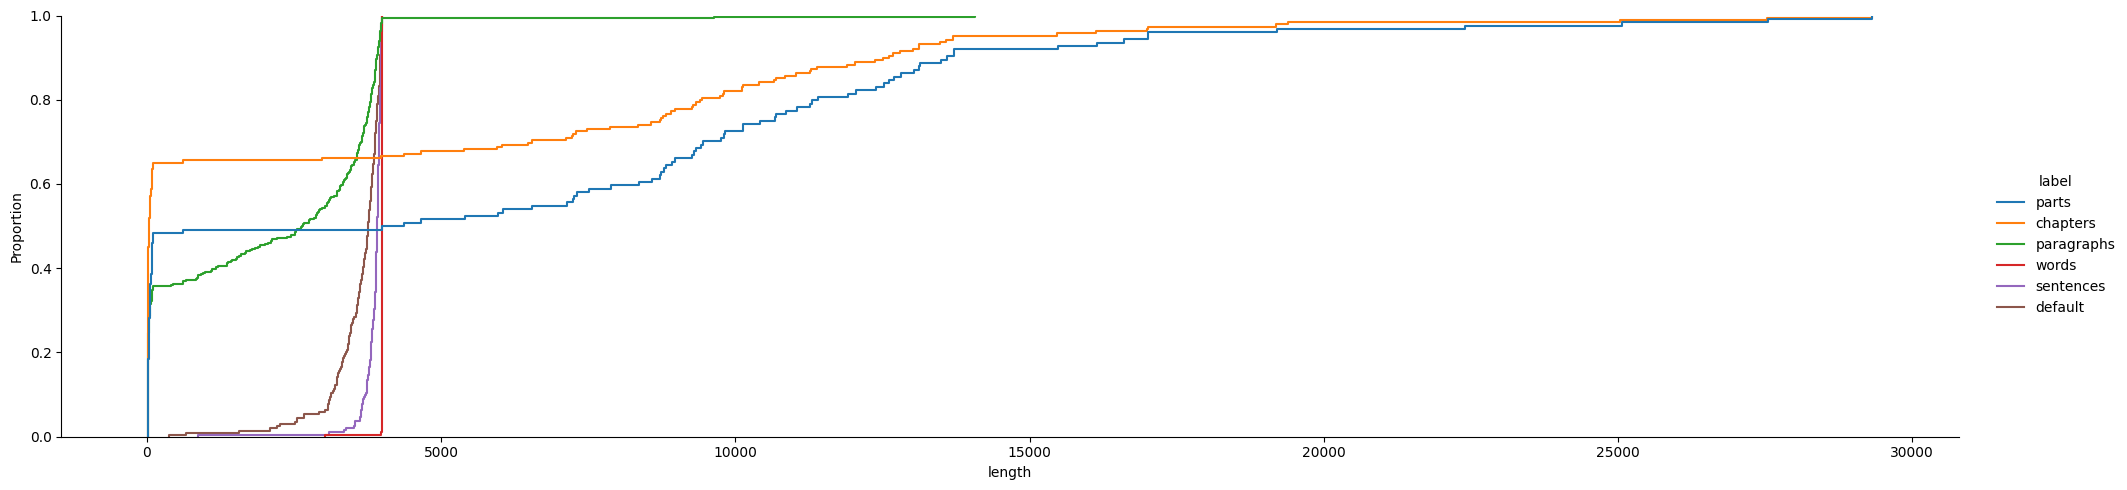

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

all = DataFrame()
params = {'chunk_size': 4000, 'chunk_overlap': 200}

def run_splitter(label: str, splitter: TextSplitter):
    global all
    parts = splitter.split_text(book.page_content)
    df = DataFrame([len(p) for p in parts], columns = ['length']).assign(label=label)
    all = pd.concat([all, df])

run_splitter('parts', CharacterTextSplitter(separator = "\n\n\n\n", **params))
run_splitter('chapters', RecursiveCharacterTextSplitter(separators = ["\n\n\n\n", "\n\n\n"], **params))
run_splitter('paragraphs', RecursiveCharacterTextSplitter(separators = ["\n\n\n\n", "\n\n\n", "\n\n"], **params))
run_splitter('words', CharacterTextSplitter(separator = " ", **params))
run_splitter('sentences', NLTKTextSplitter(separator = " ", **params))
run_splitter('default', RecursiveCharacterTextSplitter(**params))

plt.figure(figsize=(20, 5));
sns.displot(all, x='length', aspect=4, kind="ecdf", hue="label");

## Deep dive yourself
Let us first define a set of different splitters. You can add your own to see the results and compare with other methods.

In [8]:
params = {'chunk_size': 4000, 'chunk_overlap': 200}

splitters = {
  'parts': CharacterTextSplitter(separator = "\n\n\n\n", **params),
  'chapters': RecursiveCharacterTextSplitter(separators = ["\n\n\n\n", "\n\n\n"], **params),
  'paragraphs': RecursiveCharacterTextSplitter(separators = ["\n\n\n\n", "\n\n\n", "\n\n"], **params),
  'words': CharacterTextSplitter(separator = " ", **params),
  'sentences': NLTKTextSplitter(separator = " ", **params),
  'default': RecursiveCharacterTextSplitter(**params)
}

Next, we define some helper functions for the output and visualzation

Lastly, we output the form and the results

In [13]:
opt_splitter = widgets.Dropdown(description='splitter', options=splitters.keys())
cur_part = widgets.IntSlider(min=0, max=50, step=1, value=0)
form_data = widgets.HBox([opt_books, opt_splitter], layout = {'margin': '0px 0px 20px'})

# display

display(widgets.VBox([form_data, cur_part]))

In [ ]:
def rebuild_dataset(*args):
    build_index_for_selection(opt_dataset.value, opt_measure.value, opt_strategy.value)
    f_query.options = list(queries)
    f_predicate.options = ['<none>'] + list(predicates.keys())
    f_selection.options = ['<none>'] + list(selections.keys())
    k = f_k.value
    f_k.value = 0
    f_k.value = k

# build the dataset widgets
form_data = widgets.HBox([opt_dataset, opt_measure, opt_strategy], layout = {'margin': '0px 0px 20px'})
opt_dataset.observe(rebuild_dataset, 'value')
opt_measure.observe(rebuild_dataset, 'value')
opt_strategy.observe(rebuild_dataset, 'value')

# build query form
f_query = widgets.Dropdown(description='query', options=list(queries))
f_k = widgets.IntSlider(min=5, max=50, step=5, value=20)
f_predicate = widgets.Dropdown(description='predicate',options=['<none>'] + list(predicates.keys()))
f_selection = widgets.Dropdown(description='selection',options=['<none>'] + list(selections.keys()))
form_query = widgets.interactive(run_query, query=f_query, k=f_k, predicate=f_predicate, selection=f_selection)

# display
display(widgets.VBox([form_data, form_query]))